# Cross-Modality Association Network

## Typical Data pre-processing

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df=pd.read_csv('Padded.csv')

In [101]:
df_2=df

In [102]:
df_2.columns

Index(['Unnamed: 0', 'Time', 'P_ID', 'Speed_MPH', 'ATP', 'BP_Hg', 'JF', 'FF',
       'Src_Temperature', 'Src_Pressure', 'Src_Humidity', 'Src_WindSpeed',
       'Src_Weather_Info', 'NR_HR', 'Age', 'Trait_Anxiety', 'Extraversion',
       'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness',
       'Weekday', 'Gender_Female'],
      dtype='object')

In [103]:
df_2['Weekend']=np.abs(1-df_2['Weekday'])
df_2['Gender_Male']=np.abs(1-df_2['Gender_Female'])

In [104]:
df_2

,Unnamed: 0,Time,P_ID,Speed_MPH,ATP,BP_Hg,JF,FF,Src_Temperature,Src_Pressure,...,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,154496,2022-05-16 08:01:40,P15,0.0,31.800000,28.9,0.64059,34.05,68.77,1014.0,...,38,10,8,6,7,6,1,1,0,0
1,154497,2022-05-16 08:01:41,P15,0.0,31.800000,28.9,0.64059,34.05,68.77,1014.0,...,38,10,8,6,7,6,1,1,0,0
2,154498,2022-05-16 08:01:42,P15,0.0,31.800000,28.9,0.64059,34.05,68.77,1014.0,...,38,10,8,6,7,6,1,1,0,0
3,154499,2022-05-16 08:01:43,P15,0.0,31.800000,28.9,0.64059,34.05,68.77,1014.0,...,38,10,8,6,7,6,1,1,0,0
4,154500,2022-05-16 08:01:44,P15,0.0,31.800000,28.9,0.64059,34.05,68.77,1014.0,...,38,10,8,6,7,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,2665439,2022-07-24 18:44:02,P36,0.0,2.700000,29.8,0.00000,28.46,93.70,1017.0,...,50,6,7,6,5,8,0,1,1,0
305982,2665427,2022-07-24 18:44:03,P36,0.0,2.700000,29.8,0.00000,28.46,93.70,1017.0,...,50,6,7,6,5,8,0,1,1,0
305983,2665428,2022-07-24 18:44:04,P36,0.0,2.050000,29.8,0.00000,28.46,93.70,1017.0,...,50,6,7,6,5,8,0,1,1,0
305984,2665429,2022-07-24 18:44:05,P36,0.0,1.166667,29.8,0.00000,28.46,93.70,1017.0,...,50,6,7,6,5,8,0,1,1,0


In [105]:
df_2.drop(['Unnamed: 0','Time','P_ID','Src_WindSpeed','BP_Hg','Src_Temperature','Src_Pressure','Src_Humidity'],axis=1,inplace=True)

In [106]:
df['Src_Weather_Info'].replace(['Clear','Clouds','Drizzle','Haze','Mist','Thunderstorm'],
                        [0,1,2,3,4,5], inplace=True)

In [107]:
df_2.rename(columns={"NR_HR": "HR_Norm", "JF": "Jam Factor","FF":"Free Flow","Speed_MPH":"Speed"}, inplace=True)

In [108]:
df_2

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1,0,0
1,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1,0,0
2,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1,0,0
3,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1,0,0
4,0.0,31.800000,0.64059,34.05,0,22.532948,29,38,10,8,6,7,6,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1,1,0
305982,0.0,2.700000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1,1,0
305983,0.0,2.050000,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1,1,0
305984,0.0,1.166667,0.00000,28.46,5,45.415647,28,50,6,7,6,5,8,0,1,1,0


In [109]:
df_psych=df_2.drop(['Speed','ATP','Jam Factor','Free Flow','Src_Weather_Info','Weekday','Weekend'], axis=1)

In [110]:
df_2.corr()['HR_Norm'].sort_values()

Age                 -0.162653
Weekend             -0.151911
ATP                 -0.103804
Openness            -0.101796
Free Flow           -0.074933
Speed               -0.050838
Gender_Female       -0.047555
Jam Factor           0.014938
Agreeableness        0.033793
Extraversion         0.046044
Gender_Male          0.047555
Src_Weather_Info     0.086560
Neuroticism          0.113174
Conscientiousness    0.116207
Weekday              0.151911
Trait_Anxiety        0.153085
HR_Norm              1.000000
Name: HR_Norm, dtype: float64

## Scaling the Data

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scalar=StandardScaler()

In [113]:
def scale_df(df):
    scalar=StandardScaler()
    scalar.fit(df)
    df_scale=scalar.transform(df)
    df_scaled=pd.DataFrame(data=df_scale, columns=df.columns)
    return df_scaled

In [114]:
df_scaled=scale_df(df_2)

In [115]:
df_scaled

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
1,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
2,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
3,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
4,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305982,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305983,-1.268567,-1.290525,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305984,-1.268567,-1.345077,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924


In [116]:
# from scipy.stats import probplot
# for i in df_2.columns:
#     probplot(x=df_2[i],dist='norm',plot=plt)
#     plt.title(i)
#     plt.show()

In [117]:
# from sklearn.preprocessing import FunctionTransformer

In [118]:
# from sklearn.compose import ColumnTransformer

In [119]:
# df_2.columns

In [120]:
# df_2=df_2.drop('Src_Weather_Info', axis=1)

In [121]:
# log_transform = FunctionTransformer(lambda x: np.log(x))
# ct = ColumnTransformer(transformers=[['log_transform',log_transform,list(range(len(df_scaled.columns)))]],remainder='passthrough')
# log_X = ct.fit_transform(df_scaled).copy()
# log_X = pd.DataFrame(log_X,columns=df_scaled.columns).copy()

## Building the Network

In [122]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

def calculate_spearman(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(spearmanr(df[r], df[c])[1], 4)
    return pvalues
def calculate_pearson(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [123]:
def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

In [124]:
corr = df_2.corr(method=spearmanr_pval)

In [125]:
corr

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.362154e-209,2.446943e-154,0.000000e+00,5.038411e-124,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.857894e-149,0.000000e+00,1.857894e-149,0.000000e+00
ATP,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.068081e-141,0.000000e+00,0.000000e+00,0.000000e+00,1.092364e-13,0.000000e+00,2.232939e-03,4.026714e-13,0.000000e+00,4.026714e-13,0.000000e+00
Jam Factor,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,5.328184e-18,1.281746e-04,5.206359e-49,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Free Flow,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.530111e-08,0.000000e+00,0.000000e+00,8.901646e-83,0.000000e+00,0.000000e+00,1.449367e-07,0.000000e+00,1.449367e-07,0.000000e+00
Src_Weather_Info,2.362154e-209,0.000000e+00,5.328184e-18,0.000000e+00,1.000000e+00,0.000000e+00,1.029786e-179,3.475498e-52,0.000000e+00,0.000000e+00,1.361344e-175,5.710236e-115,2.851106e-27,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
HR_Norm,2.446943e-154,0.000000e+00,1.281746e-04,0.000000e+00,0.000000e+00,1.000000e+00,6.412118e-11,0.000000e+00,1.301942e-99,2.210722e-150,0.000000e+00,0.000000e+00,9.057045e-01,0.000000e+00,2.648670e-217,0.000000e+00,2.648670e-217
Age,0.000000e+00,1.068081e-141,5.206359e-49,0.000000e+00,1.029786e-179,6.412118e-11,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.365924e-217,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Trait_Anxiety,5.038411e-124,0.000000e+00,0.000000e+00,9.530111e-08,3.475498e-52,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.470512e-61,0.000000e+00,3.470512e-61,0.000000e+00
Extraversion,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.301942e-99,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.734318e-80,4.049264e-08,5.734318e-80,4.049264e-08
Agreeableness,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.210722e-150,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.512935e-04,0.000000e+00,5.512935e-04,0.000000e+00


In [126]:
df_2=df_scaled

In [127]:
# corr_matrix=df_2.corr().abs()
# half_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# dropped_columns = [column for column in half_matrix.columns if any(half_matrix[column] > 0.8)]
# df_2.drop(dropped_columns, axis=1, inplace=True)
# dropped_columns

In [128]:
calculate_spearman(df_2)

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ATP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0022,0.0,0.0,0.0,0.0
Jam Factor,0.0,0.0,0.0,0.0,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Free Flow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Src_Weather_Info,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
HR_Norm,0.0,0.0,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9057,0.0,0.0,0.0,0.0
Age,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Trait_Anxiety,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Extraversion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Agreeableness,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0006,0.0,0.0006,0.0


In [129]:
df_2.corr()

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed,1.000000,0.341283,-0.341012,0.497746,-0.045151,-0.050838,-0.140517,-0.054568,-0.162847,-0.332004,-0.086751,-0.215850,0.321292,-0.049360,-0.171878,0.049360,0.171878
ATP,0.341283,1.000000,-0.170785,0.324931,-0.125537,-0.103804,-0.017973,-0.101321,0.037421,-0.076717,0.056222,-0.147115,-0.064797,-0.013948,-0.243323,0.013948,0.243323
Jam Factor,-0.341012,-0.170785,1.000000,-0.377087,0.059352,0.014938,0.025940,0.116482,0.127196,0.228033,0.118651,0.197719,-0.244296,0.127126,0.165684,-0.127126,-0.165684
Free Flow,0.497746,0.324931,-0.377087,1.000000,-0.127048,-0.074933,-0.115663,0.024969,-0.188748,-0.211201,-0.058637,-0.166655,0.157920,0.008745,-0.085352,-0.008745,0.085352
Src_Weather_Info,-0.045151,-0.125537,0.059352,-0.127048,1.000000,0.086560,0.019942,-0.013279,0.131487,0.099386,0.085628,0.001695,0.030872,-0.125516,0.053550,0.125516,-0.053550
HR_Norm,-0.050838,-0.103804,0.014938,-0.074933,0.086560,1.000000,-0.162653,0.153085,0.046044,0.033793,0.116207,0.113174,-0.101796,0.151911,-0.047555,-0.151911,0.047555
Age,-0.140517,-0.017973,0.025940,-0.115663,0.019942,-0.162653,1.000000,-0.514317,0.338072,0.349916,-0.201567,-0.224285,-0.005486,0.037430,0.205676,-0.037430,-0.205676
Trait_Anxiety,-0.054568,-0.101321,0.116482,0.024969,-0.013279,0.153085,-0.514317,1.000000,-0.288319,0.257384,0.230269,0.626315,-0.470257,-0.030994,0.601275,0.030994,-0.601275
Extraversion,-0.162847,0.037421,0.127196,-0.188748,0.131487,0.046044,0.338072,-0.288319,1.000000,0.604255,0.401360,0.170978,-0.362777,-0.019362,-0.023340,0.019362,0.023340
Agreeableness,-0.332004,-0.076717,0.228033,-0.211201,0.099386,0.033793,0.349916,0.257384,0.604255,1.000000,0.398081,0.505647,-0.764464,0.004142,0.572501,-0.004142,-0.572501


In [130]:
import networkx as nx

In [131]:
from matplotlib.pyplot import figure

In [132]:
G=nx.Graph()

In [133]:
pvals=calculate_spearman(df_2)

In [134]:
columns=pvals.columns

In [135]:
pvalues=pvals.values

In [136]:
nonzero=[]
for row in pvalues:
    for val in row:
        if val!=0:
            nonzero.append(val)

In [137]:
benjamini_hochberg=[]

In [138]:
sort=sorted(nonzero)
for i in range(len(sort)):
    benjamini_hochberg.append((i+1)*0.05) 

In [139]:
benjamini_hochberg

[0.05,
 0.1,
 0.15000000000000002,
 0.2,
 0.25,
 0.30000000000000004,
 0.35000000000000003,
 0.4,
 0.45,
 0.5,
 0.55,
 0.6000000000000001,
 0.65,
 0.7000000000000001]

In [140]:
sort

[0.0001,
 0.0001,
 0.0006,
 0.0006,
 0.0006,
 0.0006,
 0.0022,
 0.0022,
 0.4132,
 0.4132,
 0.4132,
 0.4132,
 0.9057,
 0.9057]

In [141]:
# sm.stats.multitest.multipletests(pvals, alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)

In [142]:
columns

Index(['Speed', 'ATP', 'Jam Factor', 'Free Flow', 'Src_Weather_Info',
       'HR_Norm', 'Age', 'Trait_Anxiety', 'Extraversion', 'Agreeableness',
       'Conscientiousness', 'Neuroticism', 'Openness', 'Weekday',
       'Gender_Female', 'Weekend', 'Gender_Male'],
      dtype='object')

In [143]:
nonzeros={}
nonzeros['Indexes']=[]
nonzeros['Elements']=[]
nonzeros['Columns']=[]
for index, col in pvals.iteritems():
    counter=0
    arr=col.values
    for elem in arr:
        if elem>0:
            nonzeros['Indexes'].append(index)
            nonzeros['Elements'].append(elem)
            nonzeros['Columns'].append(columns[counter])
        counter+=1

In [144]:
df_map=pd.DataFrame()

In [145]:
df_map['Source']=nonzeros['Indexes']

In [146]:
df_map['Destination']=nonzeros['Columns']

In [147]:
df_map['Weights']=-np.log(nonzeros['Elements'])

In [148]:
df_map

,Source,Destination,Weights
0,ATP,Openness,6.119298
1,Jam Factor,HR_Norm,9.210340
2,HR_Norm,Jam Factor,9.210340
3,HR_Norm,Openness,0.099047
4,Agreeableness,Weekday,7.418581
5,Agreeableness,Weekend,7.418581
6,Openness,ATP,6.119298
7,Openness,HR_Norm,0.099047
8,Openness,Weekday,0.883824
9,Openness,Weekend,0.883824


In [149]:
G = nx.from_pandas_edgelist(df_map, source='Source', target='Destination',
                            edge_attr='Weights')

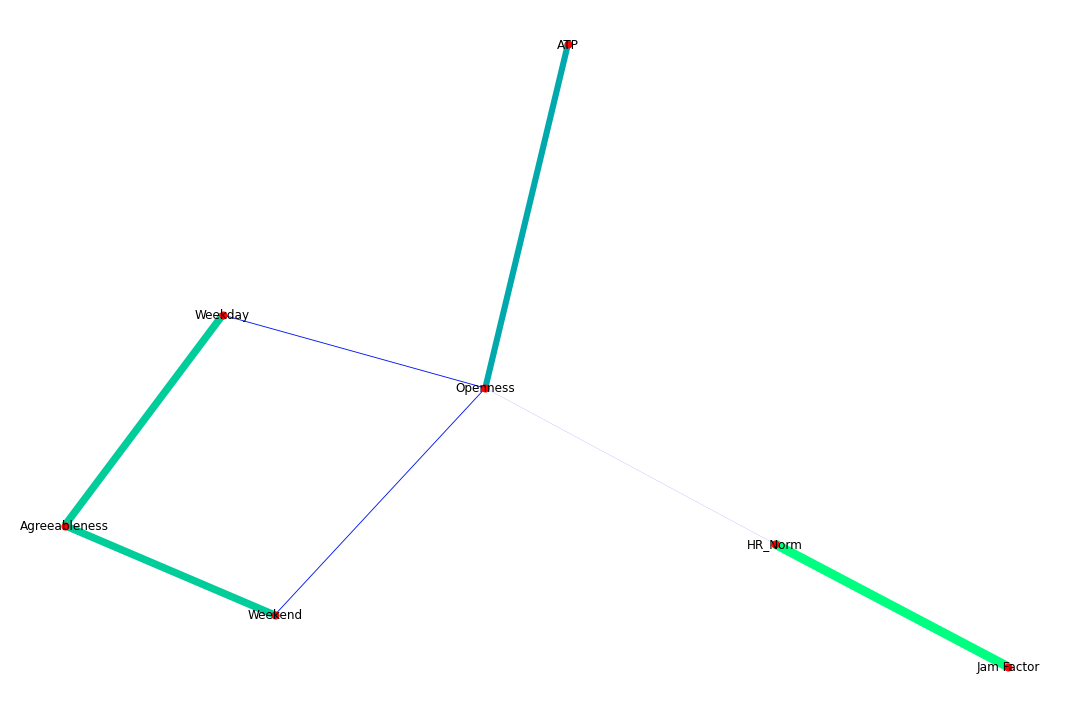

In [150]:
widths = np.array([w for *_, w in G.edges.data('Weights')])
plt.figure(figsize=(15,10))
colors = range(172)

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='r')

nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.tight_layout()

## Community Detection

In [151]:
import networkx.algorithms.community as nx_com

In [152]:
from community import community_louvain

We can define a new centrality measure that computes the sum of the absolute values of the weights from each node. 

In [153]:
def weighted_centrality(df):
    new_centrality={}
    for index, row in df.iterrows():
        if row['Source'] not in new_centrality.keys():
            new_centrality[row['Source']]=0
        new_centrality[row['Source']]+=np.abs(row['Weights'])
        if row['Destination'] not in new_centrality.keys():
            new_centrality[row['Destination']]=0
        new_centrality[row['Destination']]+=np.abs(row['Weights'])
    return new_centrality

The following method does the following: for a graph G, it applies the louvain detection algorithm 1000 times, and counts how often each pair of features is grouped together. It then determines the best way to split the features into distinct groups (communities). 

In [154]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G)
    mod = community_louvain.modularity(label, G)
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G)
        mod = community_louvain.modularity(label, G)
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=500, cmap=plt.cm.hsv)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=widths, edge_cmap=plt.cm.winter)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()
    
    

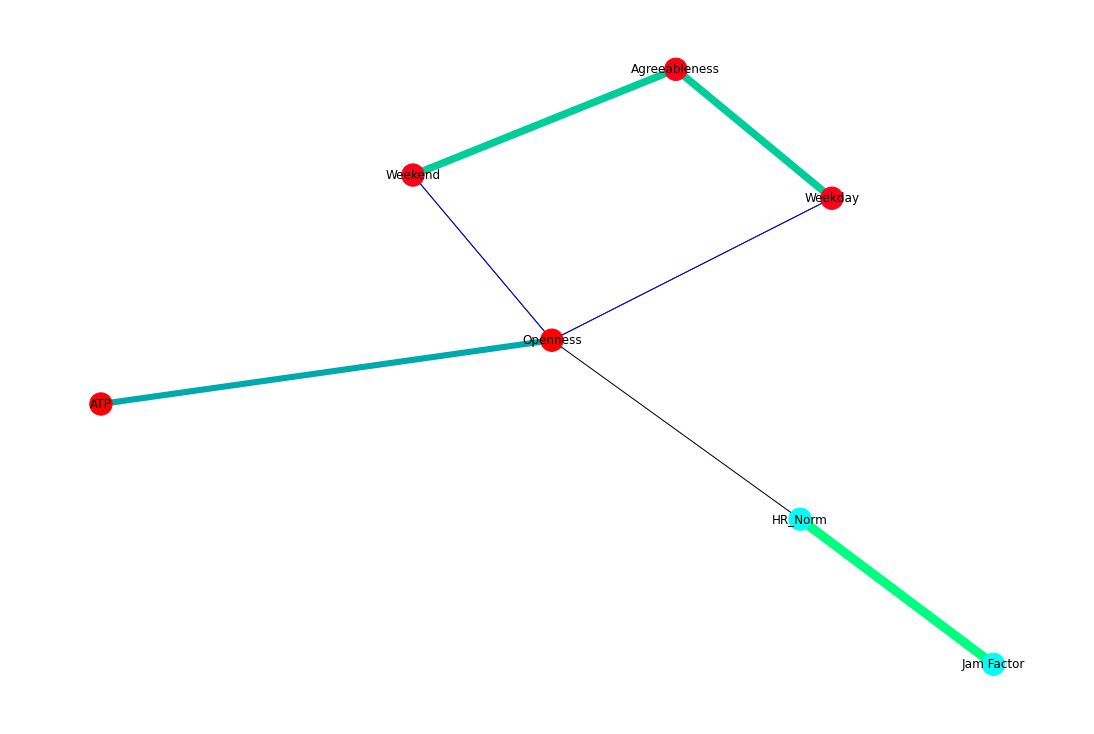

In [155]:
louvain_detection(G)

## Building the Markov Network

In [156]:
centrality=nx.eigenvector_centrality(G, weight=widths.any())

In [157]:
sorted((f"{c:0.2f}", v) for v, c in centrality.items())

[('0.14', 'Jam Factor'),
 ('0.26', 'ATP'),
 ('0.32', 'HR_Norm'),
 ('0.35', 'Agreeableness'),
 ('0.41', 'Weekday'),
 ('0.41', 'Weekend'),
 ('0.60', 'Openness')]

In [158]:
from sklearn.covariance import GraphicalLasso

In [159]:
def invcov(df):
    gl=GraphicalLasso()
    fit=gl.fit(df.values)
    inv_cov=pd.DataFrame(data=fit.covariance_,columns=df.columns)
    index={}
    for i in range(len(df.columns)):
        index[i]=df.columns[i]
    inv_cov.rename(index=index, inplace=True)
    return inv_cov

In [160]:
inv_cov=invcov(df_2)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00010652501029521227, tolerance: 7.405979779115389e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [161]:
inv_cov

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
Speed,1.000000,0.331282,-0.331012,0.487749,-0.055150,-0.050037,-0.130517,-0.064568,-0.172847,-0.322004,-0.096751,-0.224548,0.311292,-0.039356,-0.181871,0.039357,0.181877
ATP,0.331282,1.000000,-0.160785,0.314931,-0.115537,-0.093804,-0.027973,-0.099728,0.031702,-0.066717,0.046222,-0.137115,-0.054797,-0.017769,-0.233322,0.017730,0.233324
Jam Factor,-0.331012,-0.160785,1.000000,-0.367088,0.049352,0.024938,0.035940,0.106482,0.117454,0.225001,0.108651,0.197111,-0.234296,0.117129,0.155680,-0.117121,-0.155684
Free Flow,0.487749,0.314931,-0.367088,1.000000,-0.117047,-0.064933,-0.105663,0.014969,-0.178748,-0.207120,-0.068637,-0.156655,0.165721,-0.001255,-0.095345,0.001255,0.095350
Src_Weather_Info,-0.055150,-0.115537,0.049352,-0.117047,1.000000,0.076560,0.029942,-0.016499,0.121487,0.089386,0.075628,0.011695,0.020872,-0.115510,0.043552,0.115512,-0.043553
HR_Norm,-0.050037,-0.093804,0.024938,-0.064933,0.076560,1.000000,-0.164890,0.143085,0.036044,0.024117,0.106207,0.103174,-0.093148,0.141918,-0.037556,-0.141910,0.037550
Age,-0.130517,-0.027973,0.035940,-0.105663,0.029942,-0.164890,1.000000,-0.504317,0.336850,0.339915,-0.191566,-0.214286,0.004511,0.033356,0.195702,-0.033166,-0.195636
Trait_Anxiety,-0.064568,-0.099728,0.106482,0.014969,-0.016499,0.143085,-0.504317,1.000000,-0.278318,0.253829,0.220270,0.621724,-0.460258,-0.021021,0.591250,0.021017,-0.591221
Extraversion,-0.172847,0.031702,0.117454,-0.178748,0.121487,0.036044,0.336850,-0.278318,1.000000,0.594256,0.391359,0.160979,-0.372776,-0.009379,-0.013392,0.009372,0.013334
Agreeableness,-0.322004,-0.066717,0.225001,-0.207120,0.089386,0.024117,0.339915,0.253829,0.594256,1.000000,0.388082,0.515646,-0.754466,0.003651,0.562538,-0.003542,-0.562425


In [162]:
def create_invcov_df(df):
    columns=df.columns
    nonzero={}
    nonzero['Indexes']=[]
    nonzero['Elements']=[]
    nonzero['Columns']=[]
    for index, col in df.iteritems():
        counter=0
        arr=col.values
        for elem in arr:
            if np.absolute(elem-1)>0.000001 and index!=columns[counter]: #eliminate correlations between same variable
                nonzero['Indexes'].append(index)
                nonzero['Elements'].append(elem*2)
                nonzero['Columns'].append(columns[counter])
            counter+=1
    df_map=pd.DataFrame()
    df_map['Source']=nonzero['Indexes']
    df_map['Destination']=nonzero['Columns']
    df_map['Weights']=nonzero['Elements']
    return df_map

In [163]:
df_map2=create_invcov_df(inv_cov)

In [164]:
df_map2

,Source,Destination,Weights
0,Speed,ATP,0.662564
1,Speed,Jam Factor,-0.662024
2,Speed,Free Flow,0.975499
3,Speed,Src_Weather_Info,-0.110300
4,Speed,HR_Norm,-0.100075
...,...,...,...
267,Gender_Male,Neuroticism,-1.166490
268,Gender_Male,Openness,0.776506
269,Gender_Male,Weekday,-0.012313
270,Gender_Male,Gender_Female,-1.980000


Define the data features into different modalities, like biometric data (gender and age), psychometric data (extraversion, neuroticism, etc.), and so on.

In [165]:
modalities={'Speed':0,'ATP':0,'Src_Weather_Info':1,'Des_Weather_Info':1,'Age':5,'Trait_Anxiety':2,'Extraversion':2,'Agreeableness':2,'RTP':0,
           'Neuroticism':2,'Gender_Female':5,'Weekday':1,'Weekend':1,'HR_Norm':4,'Conscientiousness':2,'Free Flow':1,'Jam Factor':1,'Openness':2, 'Gender_Male':5,'BPM':4}

In [166]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 

In [167]:
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [168]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

First, the graph with all edges

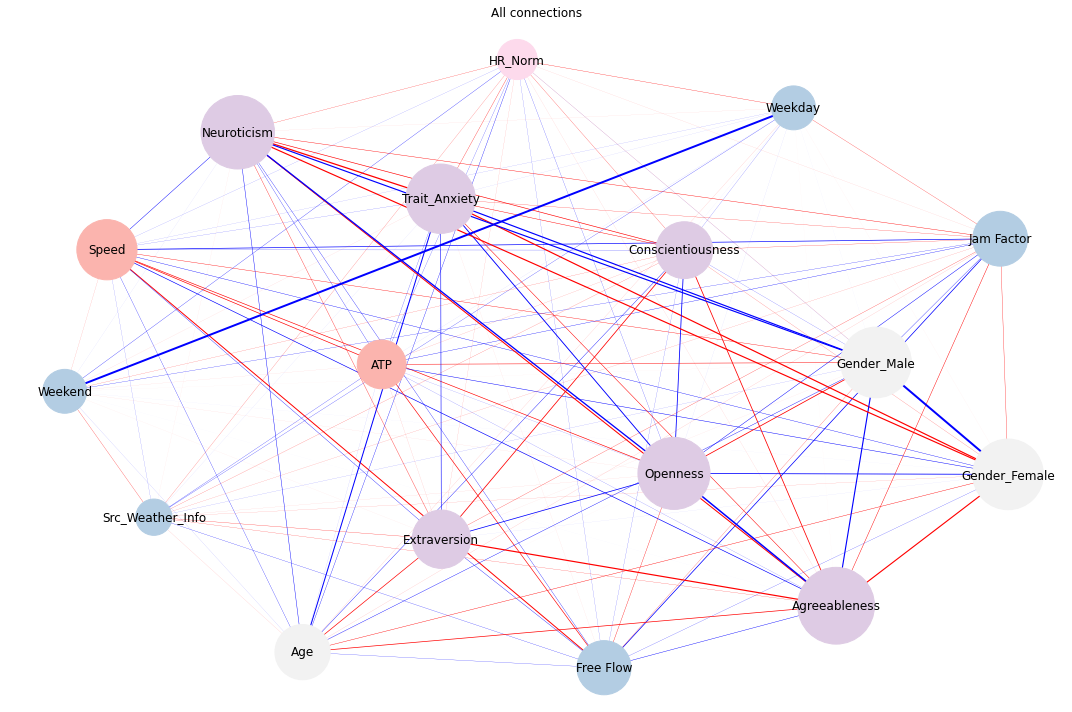

In [169]:
G = nx.from_pandas_edgelist(df_map2, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.5)
    else:
        edge_color.append(-0.5)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_map2)[node])*300 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("All connections")
plt.tight_layout()

In [170]:
df_map2

,Source,Destination,Weights
0,Speed,ATP,0.662564
1,Speed,Jam Factor,-0.662024
2,Speed,Free Flow,0.975499
3,Speed,Src_Weather_Info,-0.110300
4,Speed,HR_Norm,-0.100075
...,...,...,...
267,Gender_Male,Neuroticism,-1.166490
268,Gender_Male,Openness,0.776506
269,Gender_Male,Weekday,-0.012313
270,Gender_Male,Gender_Female,-1.980000


In [171]:
df_psych=scale_df(df_psych)

In [172]:
inv_psych=invcov(df_psych)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.853850304877843e-05, tolerance: 7.03279460909145e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(
/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:315: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 5.122e-03
  warnings.warn(


In [173]:
inv_psych

,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Gender_Female,Gender_Male
HR_Norm,1.000000,-0.161126,0.143090,0.036039,0.027832,0.106208,0.103173,-0.108203,-0.037560,0.037558
Age,-0.161126,1.000000,-0.504300,0.336852,0.339938,-0.191576,-0.214293,0.004545,0.195695,-0.195676
Trait_Anxiety,0.143090,-0.504300,1.000000,-0.278293,0.254402,0.220259,0.623713,-0.460225,0.591296,-0.591265
Extraversion,0.036039,0.336852,-0.278293,1.000000,0.594250,0.391365,0.160959,-0.372782,-0.013332,0.013353
Agreeableness,0.027832,0.339938,0.254402,0.594250,1.000000,0.388065,0.515672,-0.754431,0.562536,-0.562495
Conscientiousness,0.106208,-0.191576,0.220259,0.391365,0.388065,1.000000,0.311556,-0.398459,0.076364,-0.076346
Neuroticism,0.103173,-0.214293,0.623713,0.160959,0.515672,0.311556,1.000000,-0.649847,0.583347,-0.583318
Openness,-0.108203,0.004545,-0.460225,-0.372782,-0.754431,-0.398459,-0.649847,1.000000,-0.388279,0.388278
Gender_Female,-0.037560,0.195695,0.591296,-0.013332,0.562536,0.076364,0.583347,-0.388279,1.000000,-0.990000
Gender_Male,0.037558,-0.195676,-0.591265,0.013353,-0.562495,-0.076346,-0.583318,0.388278,-0.990000,1.000000


In [174]:
df_mapsych=create_invcov_df(inv_psych)

In [175]:
df_mapsych

,Source,Destination,Weights
0,HR_Norm,Age,-0.322251
1,HR_Norm,Trait_Anxiety,0.286179
2,HR_Norm,Extraversion,0.072078
3,HR_Norm,Agreeableness,0.055664
4,HR_Norm,Conscientiousness,0.212415
...,...,...,...
85,Gender_Male,Agreeableness,-1.124991
86,Gender_Male,Conscientiousness,-0.152693
87,Gender_Male,Neuroticism,-1.166637
88,Gender_Male,Openness,0.776556


In [176]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [177]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

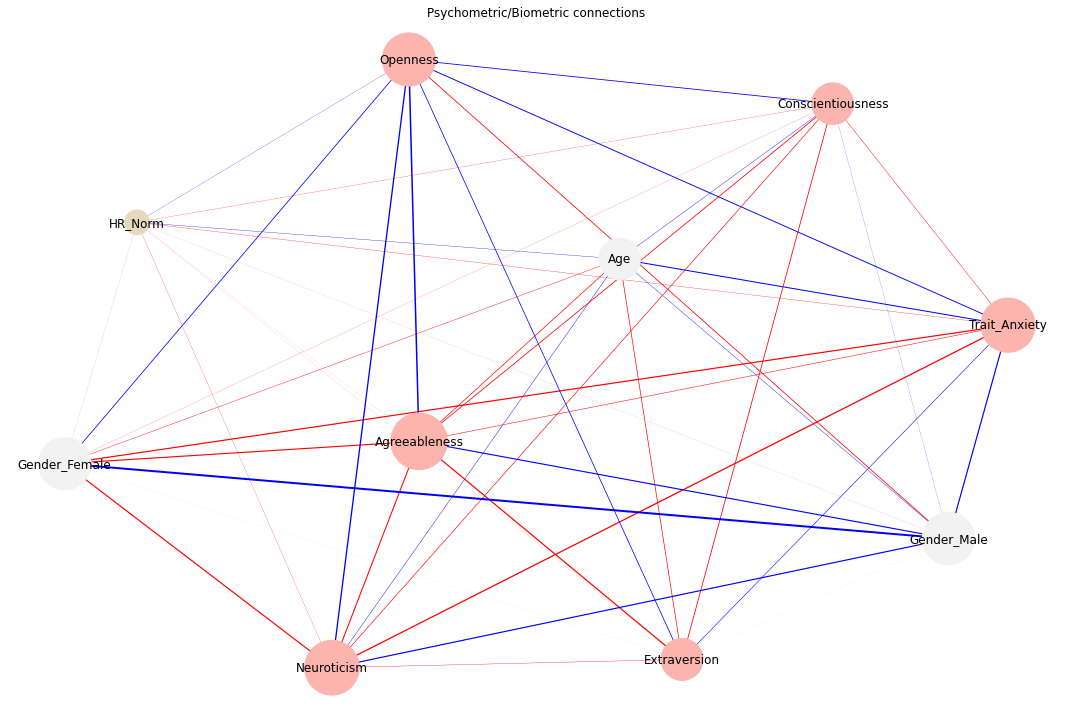

In [178]:
G = nx.from_pandas_edgelist(df_mapsych, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7)
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_mapsych)[node])*200 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")

ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Psychometric/Biometric connections")
plt.tight_layout()

In [179]:
df_2

,Speed,ATP,Jam Factor,Free Flow,Src_Weather_Info,HR_Norm,Age,Trait_Anxiety,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,Weekday,Gender_Female,Weekend,Gender_Male
0,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
1,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
2,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
3,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
4,-1.268567,0.546756,-0.481647,-0.884327,-1.065614,-0.381629,0.262830,-0.753455,2.061231,0.891930,-1.194957,0.803722,-0.433250,0.589752,0.791924,-0.589752,-0.791924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305981,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305982,-1.268567,-1.250382,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305983,-1.268567,-1.290525,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924
305984,-1.268567,-1.345077,-0.978509,-1.276099,6.278876,1.525973,0.134489,0.802229,0.081600,0.331674,-1.194957,-0.207371,0.676541,-1.695628,0.791924,1.695628,-0.791924


In [180]:
df_nops=df_2.drop(['Openness','Conscientiousness','Agreeableness','Extraversion','Neuroticism'],axis=1)

In [181]:
df_nops=scale_df(df_nops)

In [182]:
inv_nops=invcov(df_nops)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.87210258712179e-05, tolerance: 4.129009456690904e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


In [183]:
df_manos=create_invcov_df(inv_nops)

In [184]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

In [185]:
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 

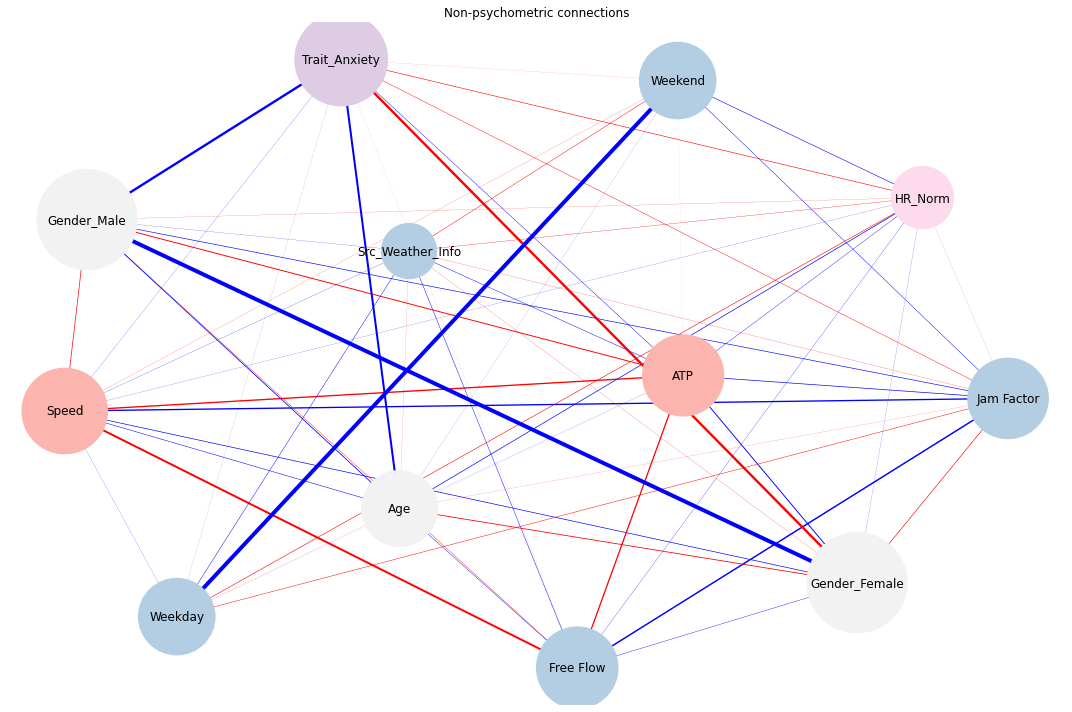

In [186]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

In [187]:
df_nospeed=df_nops.drop(['Speed'],axis=1)

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.87210258712179e-05, tolerance: 4.129009456690904e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


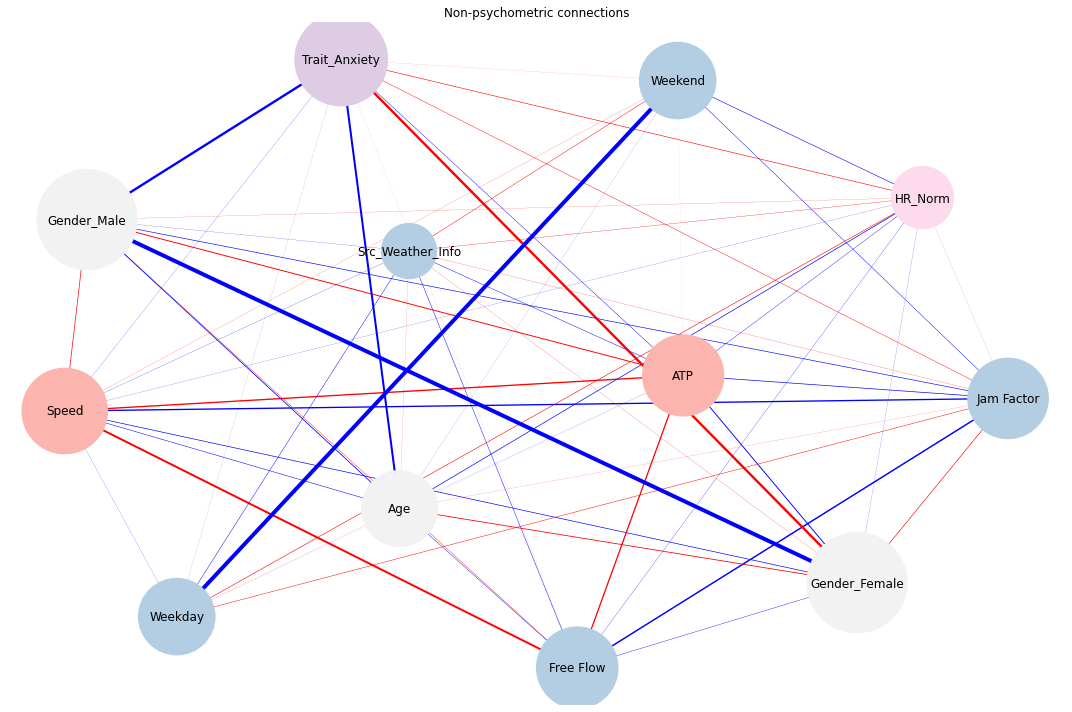

In [188]:
df_nopseed=scale_df(df_nospeed)
inv_nops=invcov(df_nops)
df_manos=create_invcov_df(inv_nops)
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

/Users/shankarpadmanabhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/covariance/_graph_lasso.py:261: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.87210258712179e-05, tolerance: 4.129009456690904e-05
  coefs, _, _, _ = cd_fast.enet_coordinate_descent_gram(


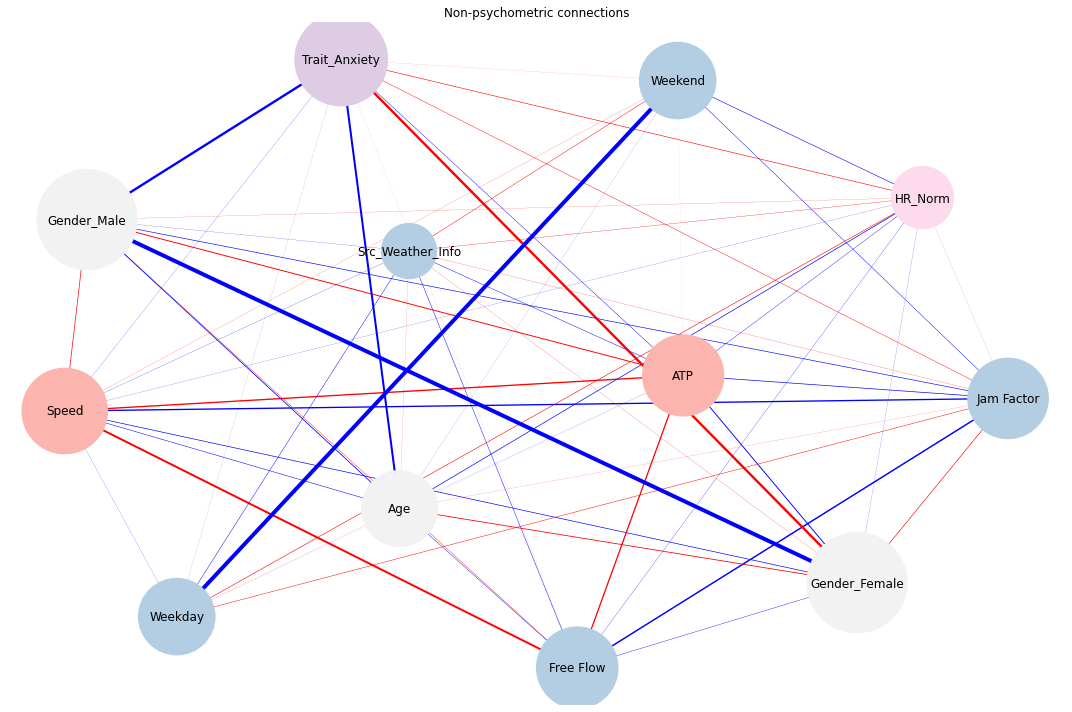

In [189]:
df_noatp=df_nops.drop(['ATP'],axis=1)
df_noatp=scale_df(df_noatp)
inv_nops=invcov(df_nops)
df_manos=create_invcov_df(inv_nops)
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)
vals2=[]
vals3={}
for key in nodelist:
    vals2.append(modalities[key])
    vals3[key]=modalities[key] 
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

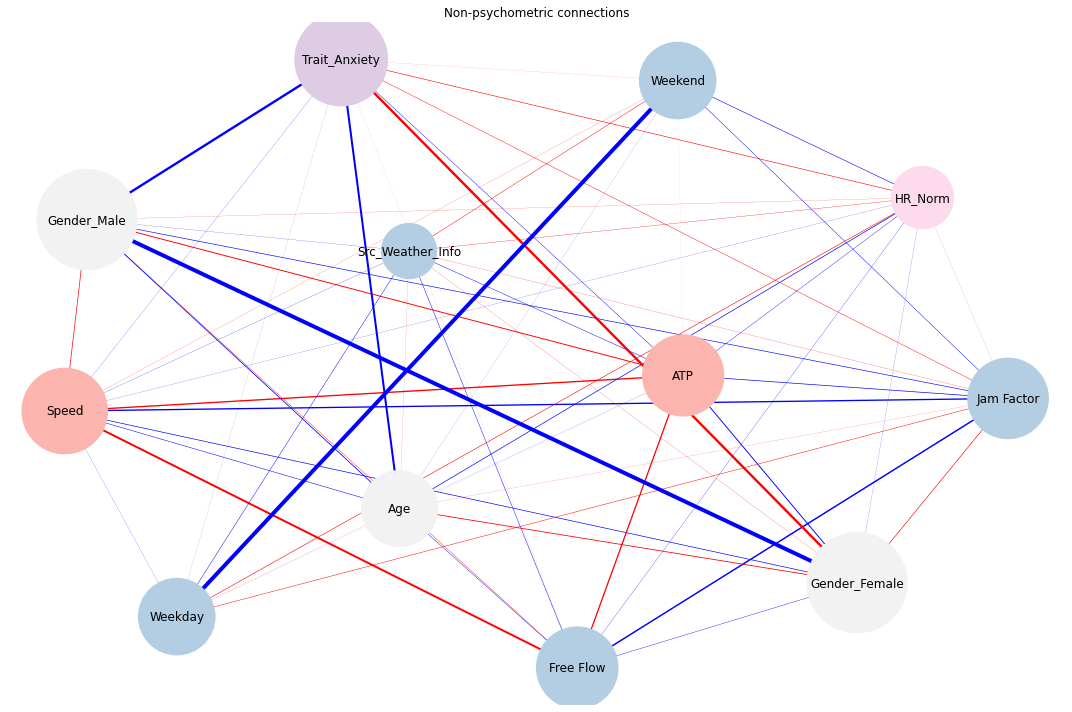

In [198]:
G = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights') 
centrality=nx.eigenvector_centrality(G, weight=widths.any())
for v, c in centrality.items():
    centrality[v]=c*c
widths = np.array([w*2 for *_, w in G.edges.data('Weights')])
edge_color=[]
for width in widths:
    if width>0:
        edge_color.append(0.1)
    else:
        edge_color.append(-0.1)
plt.figure(figsize=(15,10))
colors

pos = nx.spring_layout(G, seed=7) 
nodelist=[]
for key in pos.keys():
    nodelist.append(key)

nx.draw_networkx_nodes(G, pos, nodelist=nodelist, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodelist], node_color=[vals2[nodelist.index(node)] for node in nodelist], cmap=plt.cm.Pastel1)

nx.draw_networkx_edges(G, pos, width=widths, edge_color=edge_color, edge_cmap=plt.cm.bwr)

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")


ax = plt.gca()
ax.margins(0.01)
plt.axis("off")
plt.title("Non-psychometric connections")
plt.tight_layout()

In [203]:
def louvain_detection(G):
    nodes=list(G.nodes())
    prevalences={}
    deg_centrality = nx.degree_centrality(G)
    widths = np.array([w for *_, w in G.edges.data('Weights')])
    centrality = np.fromiter(deg_centrality.values(), float)
    label = community_louvain.best_partition(G, weight='weight')
    mod = community_louvain.modularity(label, G, weight='weight')
    values = [label.get(node) for node in G.nodes()]
    for i in range(len(values)-1):
        for j in range(i+1, len(values)):
            prevalences[(nodes[i],nodes[j])]=0 #initialize dictionary containing how often each pair grouped together
    for i in range(1000):
        deg_centrality = nx.degree_centrality(G)
        centrality = np.fromiter(deg_centrality.values(), float)
        label = community_louvain.best_partition(G, weight='weight')
        mod = community_louvain.modularity(label, G, weight='weight')
        values = [label.get(node) for node in G.nodes()]
        for j in range(len(values)-1):
            for k in range(j+1, len(values)):
                if values[j]==values[k]:
                    prevalences[(nodes[j],nodes[k])]+=1 #add one if pair grouped together 
    consen={} #initialize consensus dictionary
    for node in nodes:
        consen[node]=[]
    for key in prevalences.keys():
        consen[key[0]].append((key[1],prevalences[key]))
    pairs=[]
    for key in consen.keys():
        for elem in consen[key]:
            if elem[1]>500: #if pair grouped together more than 50% of the time, 
                            #group the elements together in consensus network
                pairs.append((key, elem[0]))
    vals={} #initialize dictionary that contains final groupings
    for i in range(len(nodes)):
        vals[nodes[i]]=i
    for i in range(len(pairs)):
        vals[pairs[i][1]]=vals[pairs[i][0]]
    values=[] #initialize array that takes final groupings
    for i in range(len(nodes)):
        values.append(0)
    for key in vals.keys():
        values[nodes.index(key)]=vals[key] #
    #Draw the graph

    plt.figure(figsize=(15,10))
    colours=[]
    K = nx.from_pandas_edgelist(df_manos, source='Source', target='Destination',
                            edge_attr='Weights')
    colors = np.array([w for *_, w in K.edges.data('Weights')])
    for color in colors:
        if color>0:
            colours.append(0.5)
        else:
            colours.append(-0.5)



    pos = nx.spring_layout(G)
    nx.draw(G, pos, nodelist=nodes, node_color=values, node_size=[np.absolute(weighted_centrality(df_manos)[node])*1000 for node in nodes], cmap=plt.cm.Pastel1)

    nx.draw_networkx_edges(G, pos, width=widths, edge_color=colours, edge_cmap=plt.cm.bwr)

    nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")
    plt.show()

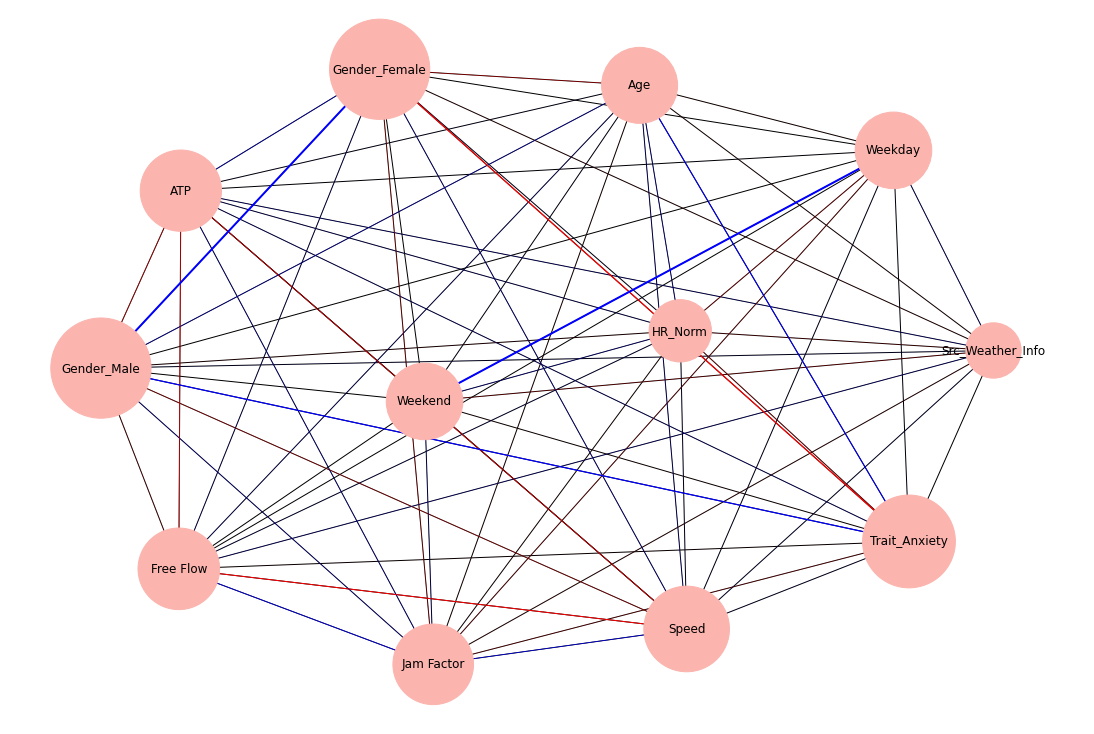

In [204]:
louvain_detection(G)

In [98]:
weighted_centrality(df_map)

{'ATP': 12.238595837235733,
 'Openness': 15.971984311384816,
 'Jam Factor': 18.420680743952364,
 'HR_Norm': 18.61877505115483,
 'Agreeableness': 29.674323610992513,
 'Weekday': 16.604808888969565,
 'Weekend': 16.604808888969565}